In [21]:
import pandas as pd

df = pd.read_csv("dataset_instagram_zandelservice.csv")

cols = ['timestamp', 'likesCount', 'commentsCount', 'productType', 'caption']
df = df[cols]

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df.head()

,timestamp,likesCount,commentsCount,productType,caption
0,2025-09-10 09:35:17+00:00,5,0,NaN,Layar HP Android kamu retak atau pecah? Tenang...
1,2025-05-27 07:00:21+00:00,-1,0,NaN,Trackpad MacBook kamu mulai nggak responsif? K...
2,2025-04-08 06:42:23+00:00,-1,0,clips,kali ini ada iPhone SE 2020 dengan kendala bac...
3,2025-03-30 06:54:56+00:00,-1,1,NaN,Selamat Hari Raya Idul Fitri 1446 H 🙏\n\nZande...
4,2025-05-27 06:57:11+00:00,-1,2,NaN,MacBook kamu cepat habis baterainya? Sering ti...


In [22]:
df['Month'] = df['timestamp'].dt.to_period('M')
df = df.dropna(subset=['Month'])
df.head()


,timestamp,likesCount,commentsCount,productType,caption,Month
0,2025-09-10 09:35:17+00:00,5,0,NaN,Layar HP Android kamu retak atau pecah? Tenang...,2025-09
1,2025-05-27 07:00:21+00:00,-1,0,NaN,Trackpad MacBook kamu mulai nggak responsif? K...,2025-05
2,2025-04-08 06:42:23+00:00,-1,0,clips,kali ini ada iPhone SE 2020 dengan kendala bac...,2025-04
3,2025-03-30 06:54:56+00:00,-1,1,NaN,Selamat Hari Raya Idul Fitri 1446 H 🙏\n\nZande...,2025-03
4,2025-05-27 06:57:11+00:00,-1,2,NaN,MacBook kamu cepat habis baterainya? Sering ti...,2025-05


In [29]:
df['likesCount'] = pd.to_numeric(df['likesCount'], errors='coerce').fillna(0)
df['commentsCount'] = pd.to_numeric(df['commentsCount'], errors='coerce').fillna(0)

df.loc[df['likesCount'] < 0, 'likesCount'] = 0
df.loc[df['commentsCount'] < 0, 'commentsCount'] = 0

df[['likesCount', 'commentsCount']].describe()

,likesCount,commentsCount
count,77.000000,77.000000
mean,0.259740,7.545455
std,1.116887,21.200512
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,4.000000
max,5.000000,140.000000


In [31]:
monthly = df.groupby('Month').agg(
    Total_Posts=('timestamp', 'count'),
    Total_Likes=('likesCount', 'sum'),
    Total_Comments=('commentsCount', 'sum'),
    Avg_Likes_per_Post=('likesCount', 'mean'),
    Avg_Comments_per_Post=('commentsCount', 'mean')
).reset_index()

monthly

,Month,Total_Posts,Total_Likes,Total_Comments,Avg_Likes_per_Post,Avg_Comments_per_Post
0,2024-10,24,0,324,0.0,13.500000
1,2024-11,10,0,60,0.0,6.000000
2,2024-12,12,0,141,0.0,11.750000
3,2025-01,7,0,4,0.0,0.571429
4,2025-02,3,0,18,0.0,6.000000
5,2025-03,12,0,25,0.0,2.083333
6,2025-04,3,0,7,0.0,2.333333
7,2025-05,2,0,2,0.0,1.000000
8,2025-08,1,5,0,5.0,0.000000
9,2025-09,3,15,0,5.0,0.000000


In [32]:
# Data jumlah “likes” tidak tersedia atau tidak sesuai karena akun @zandelservice menyembunyikan jumlah like di profil publik.

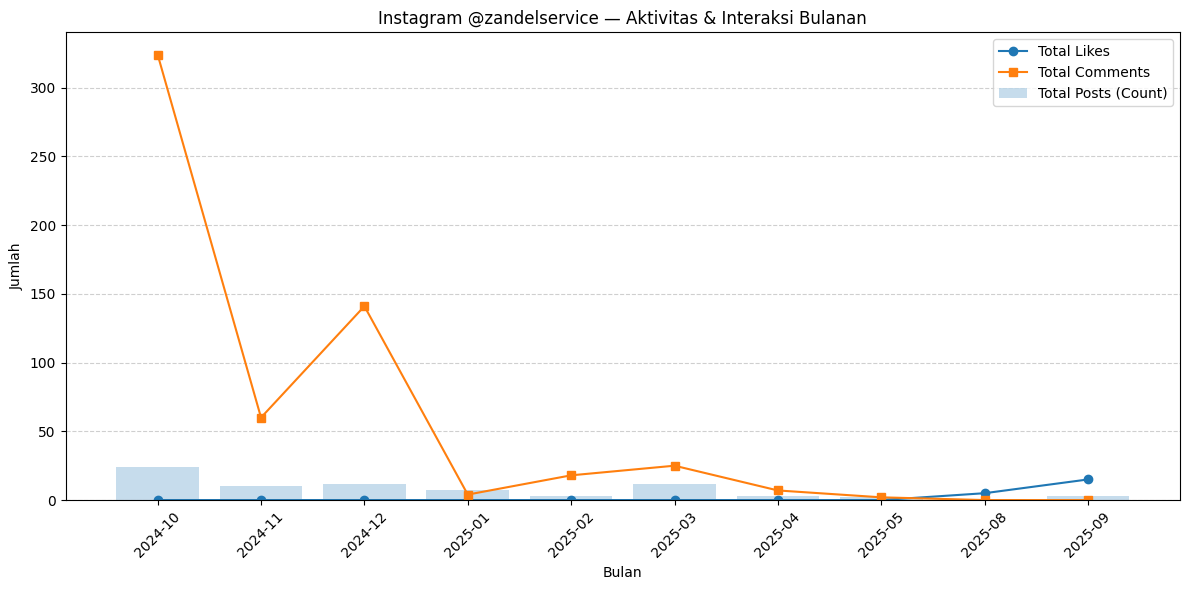

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly['Month'].astype(str), monthly['Total_Likes'], marker='o', label='Total Likes')
plt.plot(monthly['Month'].astype(str), monthly['Total_Comments'], marker='s', label='Total Comments')
plt.bar(monthly['Month'].astype(str), monthly['Total_Posts'], alpha=0.25, label='Total Posts (Count)')

plt.title('Instagram @zandelservice — Aktivitas & Interaksi Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [35]:
monthly.to_csv("zandelservice_monthly_analysis.csv", index=False)